This demo demonstrates PCA (Principal Component Analysis) on first a small dataset and then on a bigger data set,
places almanac.

Part a - Sample mean is the summation of all coordinates divided by the number of samples n, [$\frac{\sum{x_i}}{n}$,$\frac{\sum{y_i}}{n}$,$\frac{\sum{z_i}}{n}$]





In [136]:
from sklearn.preprocessing import StandardScaler
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

data = [[ 3., 2.,  1.],
                    [ 2.,  4.,  5.],
                    [ 1.,  2., 3.],
                    [0., 2., 5.]]
scaler = StandardScaler(with_std=False)
scaler.fit(data)
print("Mean:")
print(scaler.mean_)

Mean:
[1.5 2.5 3.5]


Part b) Finding the data samples with zero mean by $x=\frac{x-\mu}{\sigma}$

In [244]:
print("Transformed Data with zero center")
transformed_data = scaler.transform(data)
print(transformed_data)
print("Covariance matrix")
q = np.cov(transformed_data.T)
print(q)
print("Eigen vectors of the sample")
eig_vals, eig_vec = np.linalg.eig(q)
print(eig_vec)

print("Eigen values of the sample")
print(eig_vals)


Transformed Data with zero center
[[ 1.5 -0.5 -2.5]
 [ 0.5  1.5  1.5]
 [-0.5 -0.5 -0.5]
 [-1.5 -0.5  1.5]]
Covariance matrix
[[ 1.66666667  0.33333333 -1.66666667]
 [ 0.33333333  1.          1.        ]
 [-1.66666667  1.          3.66666667]]
Eigen vectors of the sample
[[-0.45056922 -0.66677184 -0.59363515]
 [ 0.19247228 -0.72187235  0.66472154]
 [ 0.87174641 -0.18524476 -0.45358856]]
Eigen values of the sample
[4.74888619 1.56450706 0.01994008]


Part c) We know that max |eigen value| is our first principal component and so on.


In [138]:
print("Score of the component with samples (PCA Coeffecient)")
print(np.matmul(transformed_data, eig_vec))

Score of the component with samples (PCA Coeffecient)
[[-2.95145599 -0.17610969 -0.0888421 ]
 [ 1.37104342 -1.69406159  0.0198819 ]
 [-0.30682473  0.78694448  0.19125108]
 [ 1.8872373   1.0832268  -0.12229089]]


Part d) - restructured samples are

In [144]:
from sklearn.decomposition import PCA
#Using two components
pca = PCA(n_components=2)
projected = pca.fit_transform(data)
print(projected)
print("Reconstructed Original Samples from these 2 components")
reconstructed_samples = pca.inverse_transform(projected)
print(reconstructed_samples)

print("Error")
error = np.sqrt((reconstructed_samples - data) ** 2)
print(error)

[[ 2.95145599  0.17610969]
 [-1.37104342  1.69406159]
 [ 0.30682473 -0.78694448]
 [-1.8872373  -1.0832268 ]]
Reconstructed Original Samples from these 2 components
[[ 2.94726021  2.05905526  0.95970224]
 [ 2.0118026   3.98678407  5.0090182 ]
 [ 1.11353336  1.87287129  3.0867493 ]
 [-0.07259617  2.08128939  4.94453025]]
Error
[[0.05273979 0.05905526 0.04029776]
 [0.0118026  0.01321593 0.0090182 ]
 [0.11353336 0.12712871 0.0867493 ]
 [0.07259617 0.08128939 0.05546975]]


Places Almanac

In [0]:
data_dir = "places.txt"

In [290]:
data_cols = ['city', 'climate', 'HousingCost', 'HlthCare', 'Crime',  'Transp', 'Educ', 'Arts',  'Recreat', 'Econ','casenm', 'longitude','latitude',
'pop','state']
living_condition_df =  pd.read_table(data_dir, header=None, skiprows=1, names=data_cols,error_bad_lines=False,delim_whitespace=True)
living_condition_df

,city,climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,casenm,longitude,latitude,pop,state
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,1,-99.6890,32.5590,110932,44
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,2,-81.5180,41.0850,660328,36
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,3,-84.1580,31.5750,112402,11
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,4,-73.7983,42.7327,835880,35
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,5,-106.6500,35.0830,419700,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"Worcester,MA",562,8715,1805,680,3643,3299,1784,910,5040,325,-71.7950,42.2720,402918,20
325,"Yakima,WA",535,6440,317,1106,3731,2491,996,2140,4986,326,-120.5130,46.5950,172508,48
326,"York,PA",540,8371,713,440,2267,2903,1022,842,4946,327,-76.7280,39.9600,381255,39
327,"Youngstown-Warren,OH",570,7021,1097,938,3374,2920,2797,1327,3894,328,-80.7290,41.1700,531350,36


Part a

In [0]:
# save the city names
cities = living_condition_df['city']
living_condition_df = living_condition_df.drop(labels=['city','casenm', 'longitude','latitude', 'pop','state'],axis=1)

#living_condition_df.set_index('city')
X_original = living_condition_df.copy()

Part b

In [0]:
living_condition_df = living_condition_df.apply(lambda x: np.log10(x))

In [293]:
living_condition_df

,climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
2,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
3,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
4,2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927
...,...,...,...,...,...,...,...,...,...
324,2.749736,3.940267,3.256477,2.832509,3.561459,3.518382,3.251395,2.959041,3.702431
325,2.728354,3.808886,2.501059,3.043755,3.571825,3.396374,2.998259,3.330414,3.697752
326,2.732394,3.922777,2.853090,2.643453,3.355452,3.462847,3.009451,2.925312,3.694254
327,2.755875,3.846399,3.040207,2.972203,3.528145,3.465383,3.446692,3.122871,3.590396


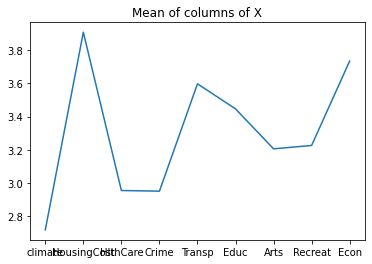

In [294]:
#Center the data
X_mean = np.mean(living_condition_df, axis = 0)
plt.plot(X_mean)
plt.title('Mean of columns of X')
plt.show()
X = living_condition_df - np.mean(living_condition_df, axis = 0)

Part c - Running PCA on the modified data and performing SVD

In [295]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit_transform(X)
print("Components:")
print(pca.components_)

Components:
[[ 0.03507288  0.09335159  0.40776448  0.10044536  0.15009714  0.03215319
   0.87434057  0.15899622  0.01949418]
 [ 0.0088782   0.00923057 -0.85853187  0.22042372  0.05920111 -0.06058858
   0.30380632  0.33399255  0.0561011 ]
 [ 0.14087477  0.12884967  0.27605769  0.5926882   0.22089816  0.0081447
  -0.36328732  0.58362605  0.12085337]
 [-0.15274476  0.17838233  0.03516139 -0.72366303  0.12620531  0.00519693
  -0.08111571  0.62822609 -0.05216997]
 [ 0.39751159  0.1753133   0.05032469 -0.01345714 -0.86996951 -0.04779772
   0.05506994  0.21328989  0.02965242]
 [-0.83129501 -0.20905725  0.08967085  0.16401885 -0.37244964 -0.02362804
   0.02812147  0.14179906  0.26481279]
 [-0.0559096   0.6958923  -0.06245284 -0.05553037  0.0724604   0.05738567
  -0.0232698  -0.23451524  0.66448592]
 [-0.31490125  0.61361583 -0.0210358   0.1823479  -0.05714199 -0.20447312
  -0.01673991 -0.08353911 -0.66203179]
 [ 0.06448925 -0.08687702  0.06550333 -0.05421223  0.07183942 -0.97327107
   0.005256

Part d

The two principal components are as follows!

In [296]:
projected = pca.fit_transform(X)

print("First two components")
print("Component 1 - v1")
print(pca.components_[:,0])
print("Component 2 - v2")
print(pca.components_[:,1])

print("Variance/Eigen values experienced by each components")
print(pca.explained_variance_)

print("The best features the cities correlate with in these 2 components is the one with the highest maintaining variance")
print("Component 1:")
print()
maxIndex_pc1 = np.argmax(np.sqrt(np.abs(pca.components_[:,0])))
print(list(living_condition_df)[maxIndex_pc1+1])

print("Component 2:")
maxIndex_pc2 = np.argmax(np.sqrt(np.abs(pca.components_[:,1])))
print(list(living_condition_df)[maxIndex_pc2+1])

First two components
Component 1 - v1
[ 0.03507288  0.0088782   0.14087477 -0.15274476  0.39751159 -0.83129501
 -0.0559096  -0.31490125  0.06448925]
Component 2 - v2
[ 0.09335159  0.00923057  0.12884967  0.17838233  0.1753133  -0.20905725
  0.6958923   0.61361583 -0.08687702]
Variance/Eigen values experienced by each components
[0.37746236 0.05105221 0.02791958 0.02296708 0.01677125 0.01195269
 0.0084567  0.00393422 0.00179733]
The best features the cities correlate with in these 2 components is the one with the highest maintaining variance
Component 1:

Arts
Component 2:
Recreat




*   PC1 - This component can be viewed as a measure of the quality of Arts, Health.
*   PC2 - This component can be viewed as a measure of how recreational the location is.

Part e

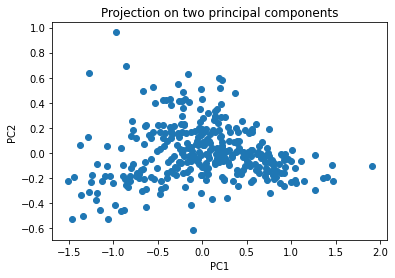

In [297]:

# Computing scores for the 2 components
scores_a_1 = projected[:,0]
scores_a_2 = projected[:,1]

plt.scatter(scores_a_1, scores_a_2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on two principal components')
plt.show()


In [298]:
print("printing top 10 cities which are outliers")
outlier_cities = []

for i, score in enumerate(scores_a_1):
  dist = np.sqrt((scores_a_1[i])**2 + (scores_a_2[i])**2)
  outlier_cities.append({'city':cities[i], 'dist': dist})

maxCity = sorted(outlier_cities, key=lambda city: city['dist'], reverse=True)
for i in range(10):
  print(maxCity[i]['city'] + " " + str(maxCity[i]['dist']))

printing top 10 cities which are outliers
New-York,NY 1.9111419267486547
Sharon,PA 1.557948133819192
Texarkana,TX-Texarkana,AR 1.530961561875393
Chicago,IL 1.4868352946346497
Los-Angeles,Long-Beach,CA 1.4618305970139218
Sherman-Denison,TX 1.4557070953609403
Danville,VA 1.4319207457633791
Brownsville-Harlington,TX 1.4226640711684897
Boston,MA 1.4147013401210553
Joplin,MO 1.4017639900840062


Part f - Applying z-score

In [0]:
#living_condition_df = living_condition_copy.apply(lambda x: x - np.std(living_condition_df_copy['']))
from scipy.stats import zscore
X_original = X_original.apply(zscore)


In [300]:

print(X_original)

      climate  HousingCost  HlthCare  ...      Arts   Recreat      Econ
0   -0.147006    -0.901297 -0.947340  ... -0.464893 -0.546646  1.946433
1    0.300664    -0.087570  0.469568  ...  0.520604  0.974442 -1.085467
2   -0.586386    -0.423054 -0.566902  ... -0.628640 -1.223512 -0.254304
3   -0.520064    -0.184142  0.244900  ...  0.324497 -0.283834  0.312735
4    0.997040     0.019500  0.666278  ...  0.290194  0.949648  0.186213
..        ...          ...       ...  ...       ...       ...       ...
324  0.192892     0.154701  0.618348  ... -0.294891 -1.160288 -0.448242
325 -0.030943    -0.800525 -0.867458  ... -0.464893  0.364519 -0.498112
326  0.010508     0.010262 -0.472042  ... -0.459284 -1.244586 -0.535052
327  0.259213    -0.556575 -0.088608  ... -0.076347 -0.643341 -1.506590
328  0.574240    -0.197998 -0.972303  ... -0.653450 -1.150371 -0.767778

[329 rows x 9 columns]


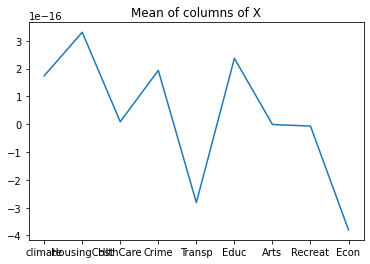

In [301]:
#Center the data
X_mean = np.mean(X_original, axis = 0)
plt.plot(X_mean)
plt.title('Mean of columns of X')
plt.show()
X_original = X_original - np.mean(X_original, axis = 0)

Running PCA on X_original

In [302]:
from sklearn.decomposition import PCA

pca_new = PCA(n_components=9)
projected = pca_new.fit_transform(X_original)
print("Components:")
print(pca_new.components_)

Components:
[[ 2.06413954e-01  3.56521608e-01  4.60214647e-01  2.81298380e-01
   3.51150781e-01  2.75292636e-01  4.63054489e-01  3.27887907e-01
   1.35412251e-01]
 [ 2.17835308e-01  2.50624000e-01 -2.99465282e-01  3.55342273e-01
  -1.79604477e-01 -4.83382093e-01 -1.94789920e-01  3.84474638e-01
   4.71283277e-01]
 [ 6.89955982e-01  2.08172230e-01  7.32492550e-03 -1.85104981e-01
  -1.46376283e-01 -2.29702548e-01  2.64842979e-02  5.08526400e-02
  -6.07314475e-01]
 [ 1.37321246e-01  5.11828708e-01  1.47018320e-02 -5.39050473e-01
  -3.02903705e-01  3.35411034e-01 -1.01080391e-01 -1.89800816e-01
   4.21769940e-01]
 [-3.69149929e-01  2.33487781e-01 -1.03240518e-01 -5.23939687e-01
   4.04348475e-01 -2.08819059e-01 -1.05097637e-01  5.29540576e-01
  -1.59620056e-01]
 [-3.74604694e-01  1.41639825e-01  3.73848037e-01 -8.09232850e-02
  -4.67591803e-01 -5.02169811e-01  4.61880719e-01 -8.99157817e-02
  -3.26081342e-02]
 [-8.47057741e-02 -2.30638624e-01  1.38676115e-02  1.86064572e-02
  -5.83390970e-0

In [303]:
projected = pca_new.fit_transform(X_original)

print("First two components")
print("Component 1 - v1")
print(pca_new.components_[:,0])
print("Component 2 - v2")
print(pca_new.components_[:,1])


print("Variance\eigen values experienced by each components")
print(pca_new.explained_variance_)

print("The best features the cities correlate with in these 2 components is the one with the highest maintaining variance")
print("Component 1:")
maxIndex_pc1 = np.argmax(np.abs(pca_new.components_[:,0]))
print(list(living_condition_df)[maxIndex_pc1])

print("Component 2:")
maxIndex_pc2 = np.argmax(np.abs(pca_new.components_[:,1]))
print(list(living_condition_df)[maxIndex_pc2+1])

First two components
Component 1 - v1
[ 0.20641395  0.21783531  0.68995598  0.13732125 -0.36914993 -0.37460469
 -0.08470577 -0.36230833  0.00139135]
Component 2 - v2
[ 0.35652161  0.250624    0.20817223  0.51182871  0.23348778  0.14163983
 -0.23063862  0.61385513  0.01360034]
Variance\eigen values experienced by each components
[3.41868293 1.21767731 1.14495927 0.9237255  0.75558148 0.63248434
 0.49455091 0.31900812 0.12076916]
The best features the cities correlate with in these 2 components is the one with the highest maintaining variance
Component 1:
HlthCare
Component 2:
Econ


First Principal Component Analysis - PCA1
The first principal component is a measure of the quality of Health and the Arts, and to some extent Housing, Transportation, and Recreation. They are all positively related to PCA1 because they all have positive signs.

Second Principal Component Analysis - PCA2
The second principal component is a measure of the severity of crime, the quality of the economy, and the lack of quality in education. Here we can see that PCA2 distinguishes cities with high levels of crime and good economies from cities with poor educational systems.

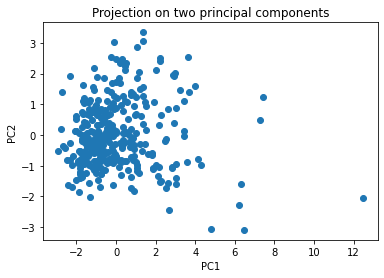

In [304]:

# Computing scores for the 2 components
scores_a_1 = projected[:,0]
scores_a_2 = projected[:,1]

plt.scatter(scores_a_1, scores_a_2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on two principal components')
plt.show()

In [305]:
print("printing top 10 cities which are outliers, i.e. they are most away from the 2 components")
outlier_cities = []

for i, score in enumerate(scores_a_1):
  dist = np.sqrt((scores_a_1[i])**2 + (scores_a_2[i])**2)
  outlier_cities.append({'city':cities[i], 'dist': dist})

maxCity = sorted(outlier_cities, key=lambda city: city['dist'], reverse=True)
for i in range(10):
  print(maxCity[i]['city'] + " " + str(maxCity[i]['dist']))

printing top 10 cities which are outliers, i.e. they are most away from the 2 components
New-York,NY 12.615317739191813
San-Francisco,CA 7.503967283005698
Los-Angeles,Long-Beach,CA 7.273060872735875
Chicago,IL 7.175093043575058
Washington,DC-MD-VA 6.598060633939288
Boston,MA 6.513087486088499
Philadelphia,PA-NJ 5.679072966460826
Miami-Hialeah,FL 4.451020228797066
Baltimore,MD 4.4117473842107255
Seattle,WA 4.2952189036383706
